In [1]:
import pandas as pd
import numpy as np
import toml
import matplotlib.pyplot as plt
%matplotlib inline

# Pathfinder Visualization
This uses our Java robot code and the [Pathfinder](https://github.com/JacisNonsense/Pathfinder) library to output trajectory points to a `.csv` file we use to plot.

Parameters are:

- `dt` = iteration time, loop period (ms)
- `v_max` = max velocity (ft/sec)
- `a_max` = max acceleration (ft/sec/sec)
- `j_max` = max jerk (ft/sec/sec/sec)
- `waypoints` = x, y, and exit angle (degrees) 


In [2]:
toml_str = """
waypoints = [
  {x = -4.0, y = -1.0, angle = -45.0},
  {x = -2.0, y = -2.0, angle = 0.0},
  {x = 0.0, y = 0.0, angle = 0.0},
]
fit              = "HERMITE_CUBIC"
sample_count     = 100_000
dt               = 0.050    # sec
max_velocity     = 1.7   # m/sec
max_acceleration = 2.0  # m/sec/sec
max_jerk         = 60.0  # m/sec/sec/sec
"""

In [3]:
trajectory_name = "pathfinder"
# import trajectory
# trajectory.build(toml_str, trajectory_name)

df = pd.read_csv("data/%s.csv" % trajectory_name)
path = toml.loads(toml_str)
wp = pd.DataFrame(path['waypoints'])

In [4]:
print("time to end point    = {:.0f} ms".format(df.index.max()))
print("max velocity         = {:.1f} ft/sec".format(df['velocity'].max()))
print("max acceleration     = {:.1f} ft/sec^2".format(df['acceleration'].max()))
print("max jerk             = {:.1f} ft/sec^3".format(df['jerk'].max()))

time to end point    = 82 ms
max velocity         = 1.7 ft/sec
max acceleration     = 2.0 ft/sec^2
max jerk             = 40.0 ft/sec^3


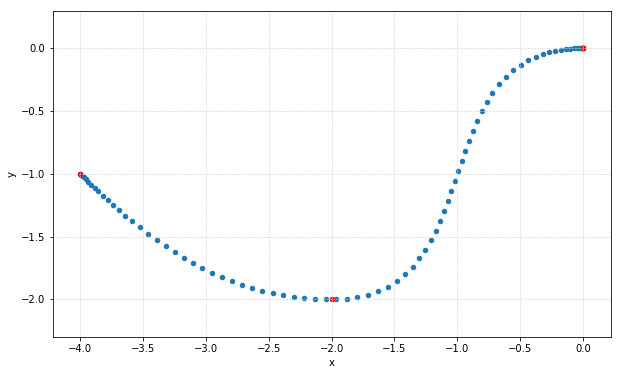

In [5]:
ax = df.plot.scatter('x', 'y', figsize = [10, 6])
wp.plot.scatter('x', 'y', c='r', ax=ax)
ax.axis('equal')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)

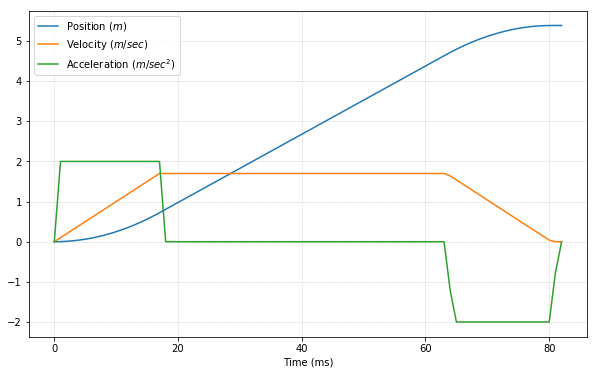

In [7]:
df.loc[:,['position', 'velocity', 'acceleration']].plot(figsize = [10, 6])
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)
plt.xlabel("Time (ms)")
l = plt.legend(["Position ($m$)", "Velocity ($m/sec$)", "Acceleration ($m/sec^2$)"])